In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("HW1 clv_transactions.csv")

In [224]:
df.head()

,TransactionID,TransactionDate,CustomerID,Amount
0,1,9/4/2012,1,20.26
1,2,5/15/2012,2,10.87
2,3,5/23/2014,2,2.21
3,4,10/24/2014,2,10.48
4,5,10/13/2012,2,3.94


In [225]:
#Step 1
print("Missing values:", df.isnull().sum())

Missing values: TransactionID      0
TransactionDate    0
CustomerID         0
Amount             0
dtype: int64


There are no missing values


In [226]:
print("Date range:", df['TransactionDate'].min(), "to", df['TransactionDate'].max())
pd.to_datetime(df['TransactionDate']).max()- pd.to_datetime(df['TransactionDate']).min()

Date range: 1/1/2011 to 9/9/2015


Timedelta('2187 days 00:00:00')

In [227]:
#Number of unique customers
df1 = pd.unique(df['CustomerID'])
print("The number of unique customers is",len(df1))

The number of unique customers is 1000


In [228]:
stats = df['Amount'].describe().transpose()

# Print the minimum, maximum, variance, and standard deviation
print("Minimum:", stats['min'])
print("Maximum:", stats['max'])
print("Variance:",df['Amount'].var())
print("Standard deviation:", stats['std'])

Minimum: -1.0
Maximum: 2033.0
Variance: 1499.5411107517461
Standard deviation: 38.72390877418945


In [229]:
#Standard descriptive statistics for the Amount field
df['Amount'].describe().transpose()

count    4186.000000
mean        9.028082
std        38.723909
min        -1.000000
25%         3.310000
50%         6.885000
75%        11.690000
max      2033.000000
Name: Amount, dtype: float64

TransactionDate
2010    2259.67
2011    4596.57
2012    7392.82
2013    6938.84
2014    8174.42
2015    8429.23
Name: Amount, dtype: float64


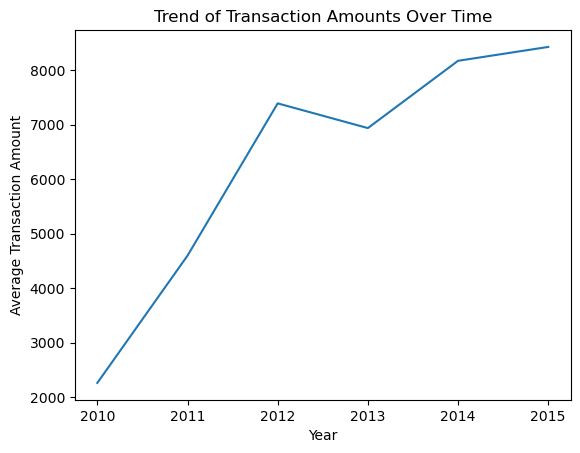

In [230]:
# Convert the Date column to datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
#Group by TransactionDate
amount_by_year = df.groupby(df['TransactionDate'].dt.year)['Amount'].sum()
print(amount_by_year)
# Plot the trend of transaction wrt time
plt.plot(amount_by_year)
plt.xlabel('Year')
plt.ylabel('Average Transaction Amount')
plt.title('Trend of Transaction Amounts Over Time')
plt.show()

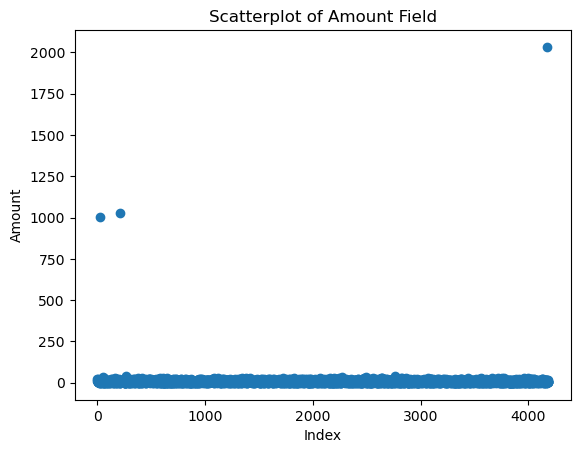

      TransactionID TransactionDate  CustomerID  Amount
23               24      2011-10-07           7  1003.0
211             212      2014-05-14          54  1027.0
4177           4178      2012-08-13        1000  2033.0


In [231]:
#Step 2
#Scatterplot of entire data
plt.scatter(range(df.shape[0]), df['Amount'].values)
plt.xlabel('Index')
plt.ylabel('Amount')
plt.title('Scatterplot of Amount Field')
plt.show()

# Print the data for the outliers
print(df.iloc[outlier_indexes])

There are 3 outliers in this data. They are very high compared to the other values and thus I chose to remove the outliers

In [232]:
#removing outliers
df = df[(df['Amount'] >= 0) & (df['Amount']<200)]

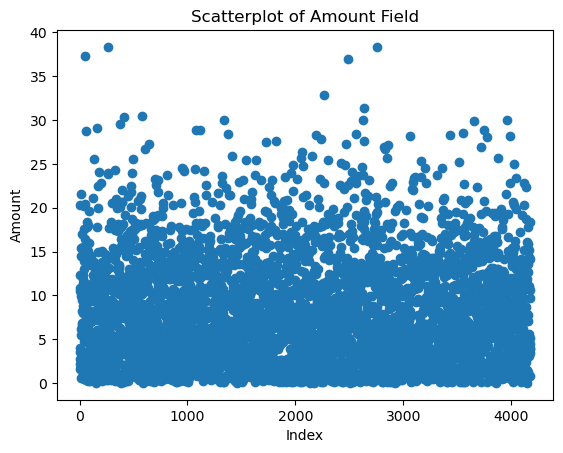

In [233]:
#Plotting the data witrhout the outliers
plt.scatter(range(df.shape[0]), df['Amount'].values)
plt.xlabel('Index')
plt.ylabel('Amount')
plt.title('Scatterplot of Amount Field')
plt.show()

In [234]:
#Step 3
#Calculating origin year of customers
import pandas as pd
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['OriginYear'] = df['TransactionDate'].dt.year
df_originYear = df.groupby(['CustomerID'])['OriginYear'].min()
df['OriginYear'] = df['CustomerID'].map(df_originYear)
display(df)

,TransactionID,TransactionDate,CustomerID,Amount,OriginYear
0,1,2012-09-04,1,20.26,2012
1,2,2012-05-15,2,10.87,2012
2,3,2014-05-23,2,2.21,2012
3,4,2014-10-24,2,10.48,2012
4,5,2012-10-13,2,3.94,2012
...,...,...,...,...,...
4181,4182,2013-06-23,1000,3.86,2010
4182,4183,2011-08-07,1000,4.00,2010
4183,4184,2012-10-07,1000,18.37,2010
4184,4185,2014-01-09,1000,3.45,2010


In [235]:

#Calculating unique years and creating the columns for the dataframes in steps 4,5,6
uniqueYears = df['OriginYear'].unique()
uniqueYears = np.array(uniqueYears)
uniqueYears = np.sort(uniqueYears)
minYear = uniqueYears.min()
result_columns = [(uniqueYear - minYear+1)*12 for uniqueYear in uniqueYears]
result_columns = ['Origin']+result_columns
display(result_columns)
display(uniqueYears)

['Origin', 12, 24, 36, 48, 60, 72]

array([2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [236]:
#Step 4: Amount
#making a new dataframe with above columns
result1 = pd.DataFrame(columns=result_columns)
#Group data by origin year
yearGrouped_df = df.groupby(['OriginYear'])

for year1 in uniqueYears:
    yearData = yearGrouped_df.get_group(year1)
    cumulativeSum = 0
    cumulativeSumData = []
    for year2 in uniqueYears:
        #Calculate cumulative sum where year matches the transaction year
        filtered_yearData = yearData[yearData['TransactionDate'].dt.year == year2]
        yearSum = filtered_yearData['Amount'].sum()
        cumulativeSum = cumulativeSum + yearSum
        cumulativeSumData.append(cumulativeSum)

    #replacing zeroes with nan values
    zeroes_count = 0
    new_cumulativeSumData =[]
    for value in cumulativeSumData:
        if value == 0:
            zeroes_count += 1
        else:
            new_cumulativeSumData.append(value)
    for i in range(zeroes_count):
        new_cumulativeSumData.append(np.nan)
    
    cumulativeSumData = new_cumulativeSumData
    #formulating the row of cumulative data
    cumulativeSumData = [f"{year1}-01-01 - {year1}-12-31"] + cumulativeSumData
    result1.loc[len(result1)] = cumulativeSumData
#repplacing nan with blank space
display(result1.fillna(''))

,Origin,12,24,36,48,60,72
0,2010-01-01 - 2010-12-31,2259.67,3614.78,5274.81,6632.37,7930.69,8964.49
1,2011-01-01 - 2011-12-31,2238.46,3757.9,5465.99,6703.11,7862.24,
2,2012-01-01 - 2012-12-31,2181.35,3874.69,5226.86,6501.85,,
3,2013-01-01 - 2013-12-31,2179.85,3609.81,5227.75,,,
4,2014-01-01 - 2014-12-31,1830.85,3262.05,,,,
5,2015-01-01 - 2015-12-31,1912.17,,,,,


In [237]:
#Step 5: Customers
result = pd.DataFrame(columns=result_columns)
yearGrouped_df = df.groupby(['OriginYear'])

for year1 in uniqueYears:
    yearData = yearGrouped_df.get_group(year1)
    cumulativeSum = 0
    cumulativeSumData = []
    for year2 in uniqueYears:
        filtered_yearData = yearData[yearData['TransactionDate'].dt.year == year1]
        customer_count = filtered_yearData['CustomerID'].nunique()
        cumulativeSumData.append(customer_count if customer_count != 0 else 0)  
    zeroes_count = 0
    new_cumulativeSumData =[]
    for value in cumulativeSumData:
        if value == 0:
            zeroes_count += 1
        else:
            new_cumulativeSumData.append(value)
    for i in range(zeroes_count):
        new_cumulativeSumData.append(np.nan)
        
    cumulativeSumData = new_cumulativeSumData
    cumulativeSumData = [str(year)+'-01-01 - '+str(year)+'-12-31'] + cumulativeSumData
    result.loc[len(result)] = cumulativeSumData
for i in range(len(result)):
    for j in range(len(result.columns)-i, len(result.columns)):
        if i+j >= 7:
            result.iloc[i,j] = 0  
result.replace(0, '', inplace=True)           
display(result.fillna(''))

,Origin,12,24,36,48,60,72
0,2015-01-01 - 2015-12-31,172,172,172,172,172,172
1,2015-01-01 - 2015-12-31,170,170,170,170,170,
2,2015-01-01 - 2015-12-31,163,163,163,163,,
3,2015-01-01 - 2015-12-31,180,180,180,,,
4,2015-01-01 - 2015-12-31,155,155,,,,
5,2015-01-01 - 2015-12-31,160,,,,,


In [238]:
result.columns[1:]

Index([12, 24, 36, 48, 60, 72], dtype='object')

In [239]:
# Step 6: Historic CLV 
result2 = pd.DataFrame()
result2['Origin'] = result1['Origin']
for i in list(result.columns[1:]):
    result2[i] = result1[i]/result[i]
display(result2.fillna(''))

,Origin,12,24,36,48,60,72
0,2010-01-01 - 2010-12-31,13.137616,21.016163,30.6675,38.560291,46.108663,52.119128
1,2011-01-01 - 2011-12-31,13.167412,22.105294,32.152882,39.430059,46.248471,
2,2012-01-01 - 2012-12-31,13.382515,23.771104,32.066626,39.88865,,
3,2013-01-01 - 2013-12-31,12.110278,20.0545,29.043056,,,
4,2014-01-01 - 2014-12-31,11.811935,21.045484,,,,
5,2015-01-01 - 2015-12-31,11.951063,,,,,


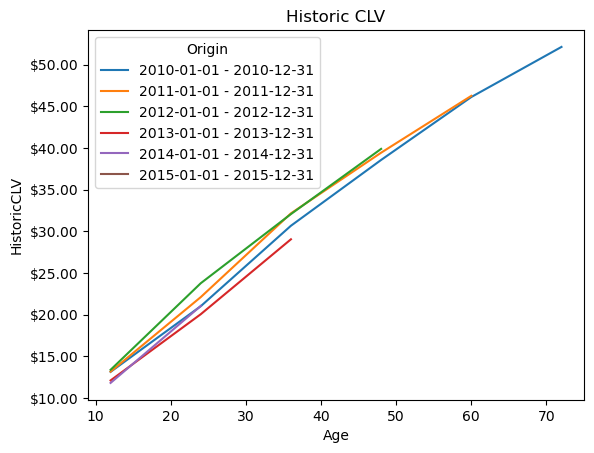

In [242]:
#Step 6 - Plotting Historic CLV
result2 = result2.set_index('Origin')
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter('${x:1.2f}')
for index, row in result2.iterrows():
    plt.plot(row, label=index)
plt.legend(title='Origin')
plt.xlabel('Age')
plt.ylabel('HistoricCLV')
plt.title("Historic CLV")
plt.show()

#Step 7

We can see from historical CLV data that consumers who were added in the corresponding year spent less money during the first year.
For instance, in 2010 the average consumer spent $13.13 
but in 2011 the average customer spent $11.95

How much have customers acquired in 2011 spent to date?
 -Customers acquired in 2011 have spent $7862.24

Do each group of customers exhibit similar or different patterns of spending? What’s the
implication for the business?
 - Each group of customers exhibit different spending patterns. 
   For all year origins there is an upward trend with age noticed as can be seen from the graphs above